# Scatter Plots

great to display correlation between multiple variables 

In [40]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


we want to correlate the median salary and the job offering for each skill

In [ ]:
# prepare the data to plot
df = df[df['job_title_short'] == 'Data Analyst'] # filter only data analysts
df_exploded = df.explode('job_skills').copy() # explode the skill list
df_skill_count = df_exploded['job_skills'].value_counts().sort_values(ascending=False).reset_index(name='Job Count') # number of jobs per skill
df_skill_salary = df_exploded.groupby('job_skills')['salary_year_avg'].median().reset_index(name='Median Salary') # median salary per skill
df_skills = df_skill_salary.merge(df_skill_count, how='inner', on='job_skills') # merged data frame to be plotted
df_skills = df_skills.sort_values(by='Job Count', ascending=False).head(10) # only top 10 most frequent skills
df_skills

,job_skills,Median Salary,Job Count
189,sql,92500.0,92428
58,excel,84479.0,66860
154,python,98500.0,57190
202,tableau,95000.0,46455
147,power bi,90000.0,39380
158,r,92527.5,29996
170,sas,90000.0,27998
149,powerpoint,85000.0,13822
228,word,80000.0,13562
169,sap,90000.0,11280


In [22]:
# instead of merging it is possible to do that:
df = df[df['job_title_short'] == 'Data Analyst'] # filter only data analysts
df_exploded = df.explode('job_skills').copy() # explode the skill list
df_skills = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), # tuple with the grouping column and the aggregation function
    median_salary=('salary_year_avg', 'median') # tuple with the grouping column and the aggregation function
)
skills_stat = df_skills.sort_values(by='skill_count', ascending=False).head(10) # sorting by count + top 10
skills_stat

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


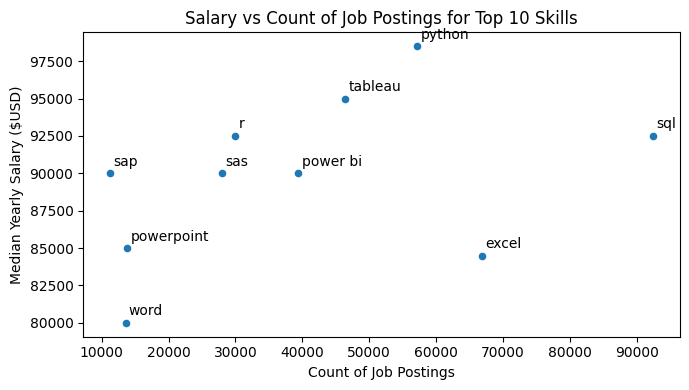

In [38]:
skills_stat.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary',
    xlabel='Count of Job Postings', 
    ylabel='Median Yearly Salary ($USD)',
    title='Salary vs Count of Job Postings for Top 10 Skills', 
    figsize=(7,4)
)
#using the plt.text function add lables --> workaround till seaborn
for i, txt in enumerate (skills_stat.index): # i is the index and txt is the column
    plt.text(skills_stat['skill_count'].iloc[i]+500, skills_stat['median_salary'].iloc[i]+500, txt) # loop to assign coordinates based on the df data

plt.tight_layout()
plt.show()

### Exercise

🟨 Median Yearly Salary vs. Job Count (2.15.1) - Problem
Matplotlib Scatter Plots
Problem Statement:

- Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
- To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
- Annotate each point with the job title name.

Hint:

Use the .plot() method of the grouped DataFrame to create the scatter plot and plt.text() for labeling each point.

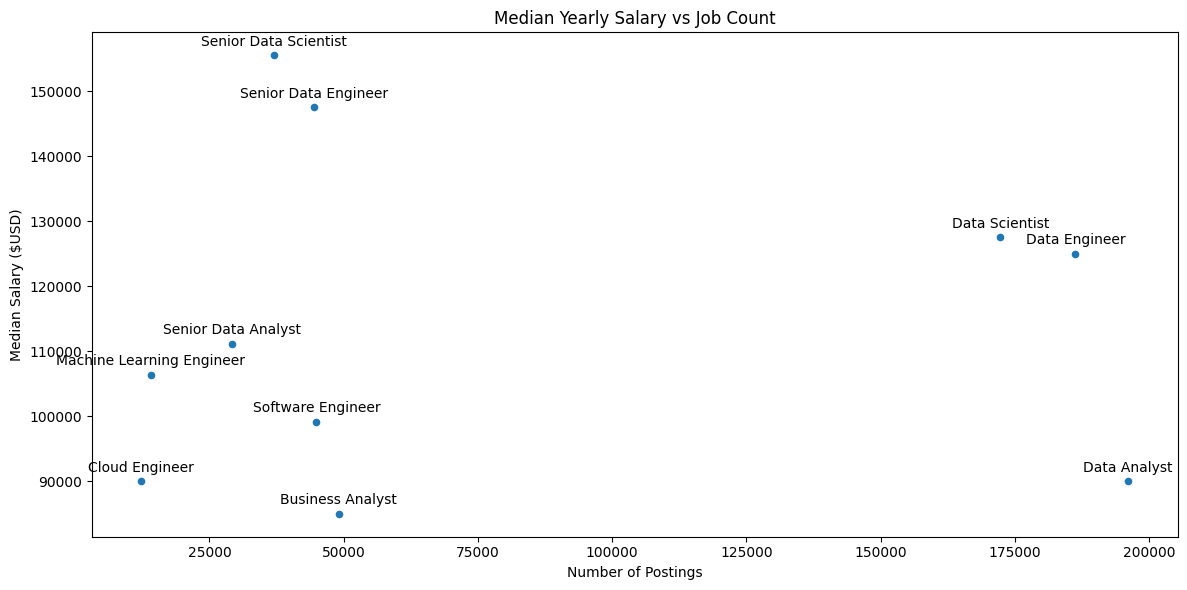

In [53]:
df_jobs = df.copy()
df_jobs = df_jobs.groupby('job_title_short').agg(
    job_count=('job_title_short', 'count'),
    median_salary=('salary_year_avg', 'median')
)
df_jobs.plot(
    kind='scatter',
    x='job_count',
    y='median_salary',
    xlabel='Number of Postings',
    ylabel='Median Salary ($USD)',
    title='Median Yearly Salary vs Job Count',
    figsize=(12,6)
)
for i, txt in enumerate(df_jobs.index):
    plt.text(df_jobs['job_count'].iloc[i], df_jobs['median_salary'].iloc[i]+1000, txt, ha='center', va='bottom')

plt.tight_layout()
plt.show()

🟨 Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem
Matplotlib Scatter Plots
Problem Statement:

Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.
Hint:

Use the .plot() method of the grouped DataFrame to create the scatter plot, and the plt.text() function to add annotations for each data point.

Additionally, I added the job title filter using an for loop + enumerate.

0 Senior Data Engineer
1 Data Analyst
2 Data Engineer
3 Business Analyst
4 Data Scientist
5 Machine Learning Engineer
6 Senior Data Analyst
7 Cloud Engineer
8 Senior Data Scientist
9 Software Engineer


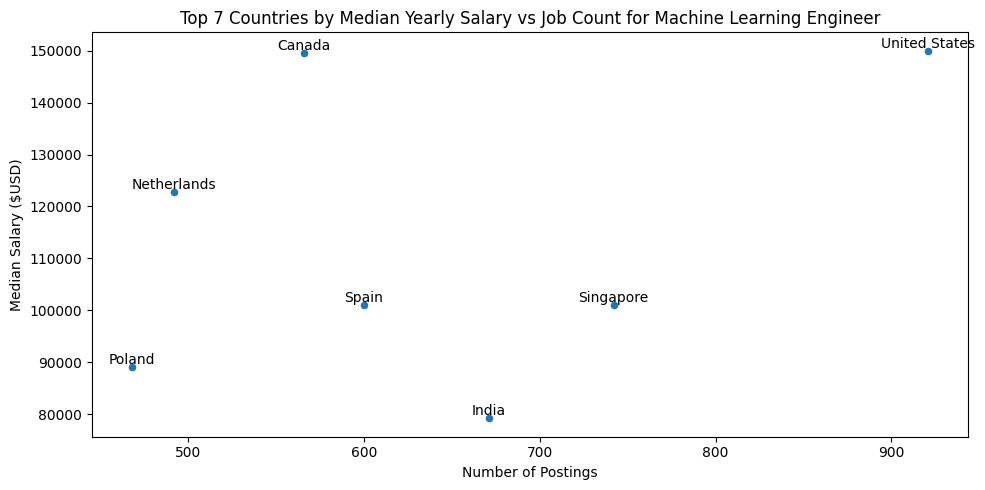

In [93]:
unique_jobs = df['job_title_short'].unique().tolist() # get the unique list of job titles
for i, value in enumerate(df['job_title_short'].unique()):
    print(i, value)
title = unique_jobs[5] # must select only one index - select the index number to filter the job
df_country = df[df['job_title_short'] == title].copy() #using the list to filter the job position
countries = df_country.groupby('job_country').agg(
    job_count=('job_country', 'count'),
    median_salary=('salary_year_avg', 'median')
)
top_countries = countries.sort_values(by='job_count', ascending=False).head(7)
top_countries.plot(
    kind='scatter',
    x='job_count',
    y='median_salary',
    xlabel='Number of Postings',
    ylabel='Median Salary ($USD)',
    title=f'Top 7 Countries by Median Yearly Salary vs Job Count for {title}', # using the f-string to add the job position in the title
    figsize=(10,5)
)
for i, txt in enumerate(top_countries.index):
    plt.text(top_countries['job_count'].iloc[i], top_countries['median_salary'].iloc[i], txt, ha='center', va='bottom')

plt.tight_layout()
plt.show()





Luke Barousse's version

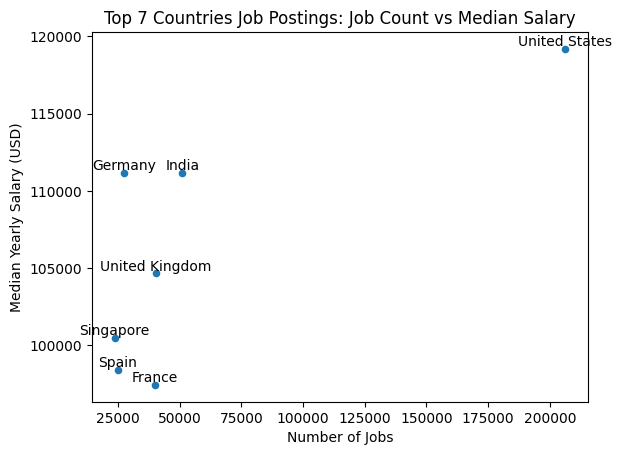

In [117]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem
Matplotlib Scatter Plots
Problem Statement:

Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
- Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
- United States for the job_country
- 'Full-time' and 'Contractor' for the job_schedule_type
- Remove roles that do not have any yearly salary data.
Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.

For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
Ensure the legend is appearing.

Label the plot's axis and title appropriately.


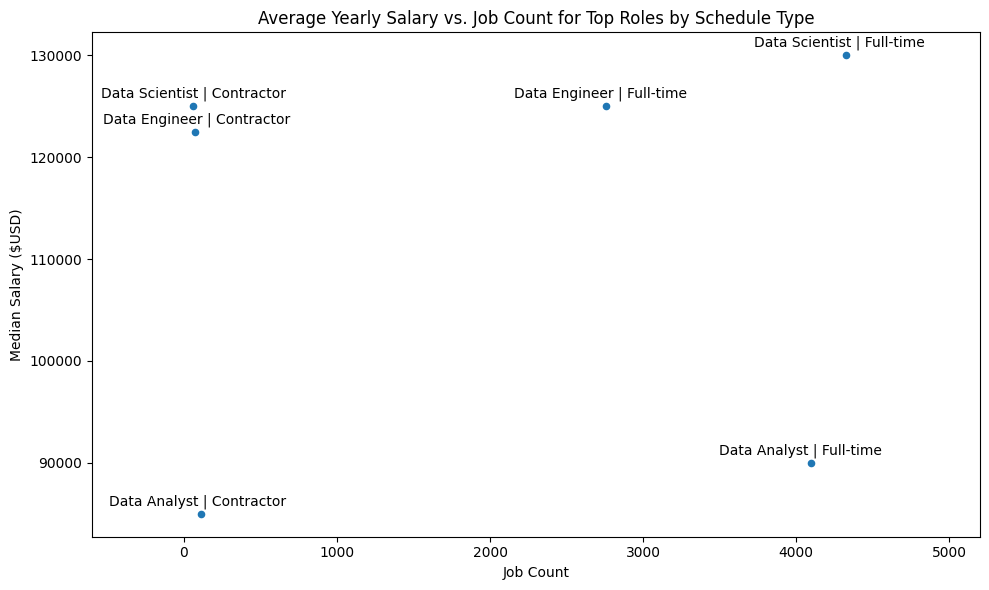

In [139]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_new = df.copy()
df_new = df_new[df_new['job_title_short'].isin(target_job_titles)]
df_new = df_new[df_new['job_country'] == 'United States']
df_new = df_new[df_new['job_schedule_type'].isin(['Full-time', 'Contractor'])]
df_new = df_new.dropna(subset = ['salary_year_avg'])
df_plot = df_new.copy()
df_plot['job_title_type'] = df_plot['job_title_short'] + ' | ' + df_plot['job_schedule_type']

job_type = df_plot.groupby('job_title_type').agg(
    job_count=('job_title_type', 'count'),
    median_salary=('salary_year_avg', 'median')
)
job_type = job_type.sort_values(by='job_count', ascending=False)

job_type.plot(
    kind='scatter', 
    figsize=(10,6),
    title='Average Yearly Salary vs. Job Count for Top Roles by Schedule Type',
    xlabel='Job Count',
    ylabel='Median Salary ($USD)', 
    x='job_count',
    y='median_salary',
    xlim=(-600,5200)
)


for i, title in enumerate(job_type.index):
    plt.text(job_type['job_count'].iloc[i]-600, job_type['median_salary'].iloc[i]+500, title, va='bottom')

plt.tight_layout()
plt.show()



alternatively:

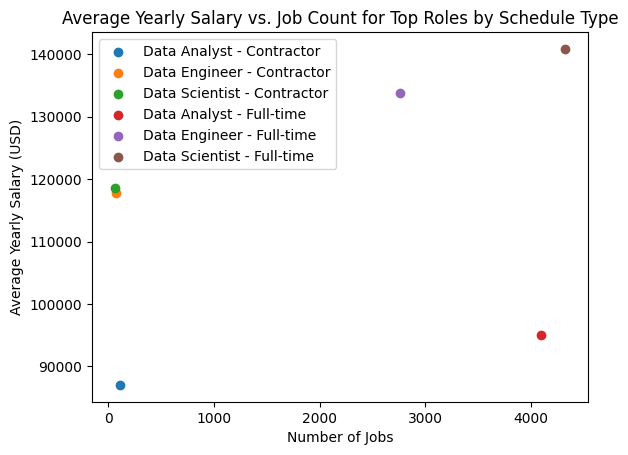

In [125]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()